# Линейная регрессия

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Данные о файле:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Кодировка переменных: https://www.kaggle.com/c/home-data-for-ml-course/data

Описание переменных:

    SalePrice: Property's sale price in dollars.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head(25)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# Названия переменных, скруггированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']

Type: object
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'S

In [5]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


### Зависимая переменная

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

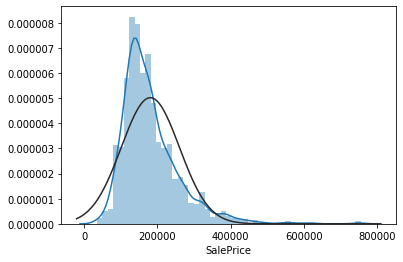

In [7]:
sns.distplot(df.SalePrice, fit=stats.norm) 

In [8]:
print('Skewness: {:.4f}'.format(df['SalePrice'].skew()))
print('Kurtosis: {:.4f}'.format(df['SalePrice'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['SalePrice'].quantile(0.9)/df['SalePrice'].quantile(0.1)))

Skewness: 1.8829
Kurtosis: 6.5363
Quartile Deviation: 42012.5000
Decile Ratio: 2.6109


In [9]:
stats.kstest(df.SalePrice, 'norm', args=(df.SalePrice.mean(), df.SalePrice.std()))

KstestResult(statistic=0.12368542719946385, pvalue=6.330230702928437e-20)

Зависимая переменная "SalePrice" имеет распределение отличное от нормального. Также оно асимметрично (сдвиг в сторону меньших значений) и характеризуется пиковостью. Среднее значение - 180444, стандартное отклонение довольно высокое - 83171. Медиана  - 159000, межквартильная широта - 42013, что также характеризует довольно большой разброс серединных 50% значений относительно медианы. Децильное отношение - 2,6. 

# Корреляции

Представлены корреляции между всеми возможными парами количественных переменных. Для ряда пар она не имеет смысла! Нужно внимательно изучить способ кодировки переменных, чтобы убедиться, что их шкала относится к метрической и коэффициент корреляции действительно отражает силу взаимосвязи между ними. Однако тепловая карта показывает, что есть группы довольно сильно коррелирующих переменных (более тёмные квадраты).

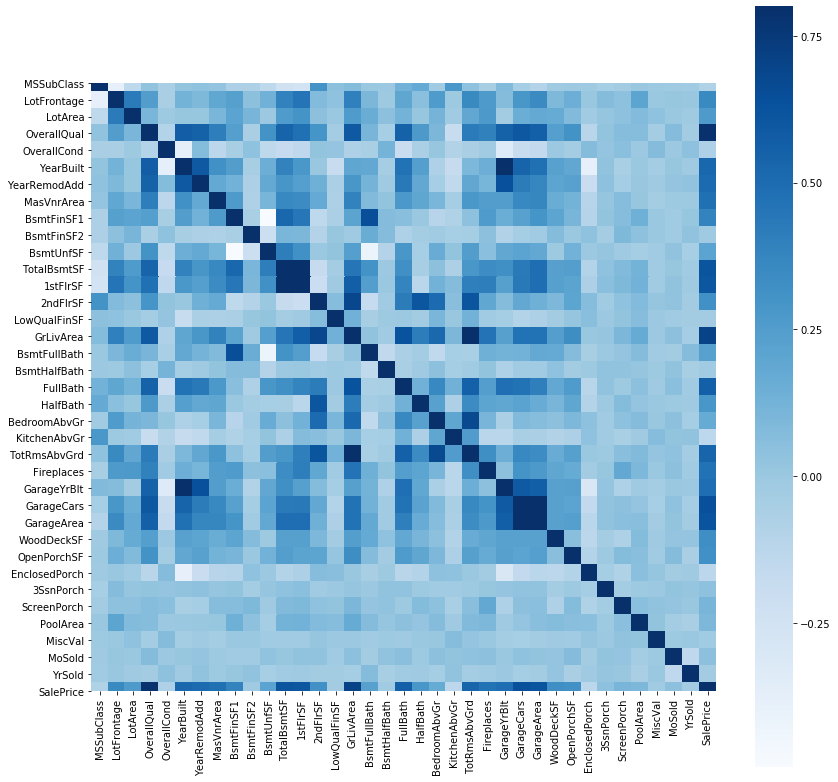

In [10]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues')
plt.show()

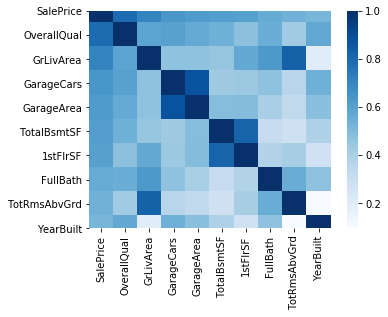

In [11]:
import numpy as np #10 самых высоких корреляций с SalesPrice 
cols = corr.nlargest(10, 'SalePrice').index
sns.heatmap(np.corrcoef(df[cols].values.T), square=True, 
            yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

In [12]:
#корреляции зависимой переменной со всеми остальными по убыванию значений коэффициентов корреляции
df.corrwith(df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [13]:
df['GarageCars'].corr(df['GarageArea'])

0.8824754142814627

In [14]:
df['TotalBsmtSF'].corr(df['1stFlrSF'])

0.8195299750050333

Корреляционный анализ позволяет сделать следующие выводы:
- Переменная OverallQual: "Overall material and finish quality" имеет самую высокую корреляцию с зависимой переменной, то есть качество постройки во многом определяет цену продажи.
- Также высокая корреляция зависимой переменной с переменной "GrLivArea: Above grade (ground) living area square feet", отражающей жилую площадь.
- Переменные "GarageCars: Size of garage in car capacity" и "GarageArea: Size of garage in square feet" также имеют высокую корреляцию с зависимой переменной. В то же время их корреляция друг с другом довольно высока. Это можно объяснить тем, что большая площадь гаража может вместить больше автомобилей. Оставим только одну переменную в качестве предиктора. Это будет "GarageCars" так как она имеет более высокую корреляцию с зависимой переменной.
- Похожая ситуация с переменными "TotalBsmtSF: Total square feet of basement area" и "1stFlrSF: First Floor square feet". Возможно причина в том, что чаще всего площадь подвала не превышает площади 1-го этажа. В модель будет включена переменная "TotalBsmtSF", поскольку она сильнее всего коррелирует с зависимой переменной.

In [15]:
df['OverallQual'].value_counts() #это порядковая переменная, не может быть добавлена в модель, как метрическая
#можно ввести в модель серией дамми-переменных

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

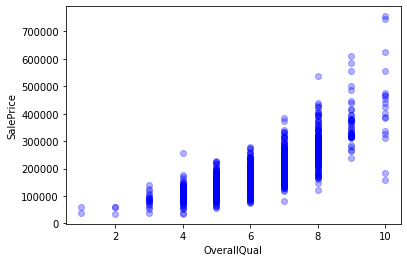

In [16]:
plt.scatter(df.OverallQual, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

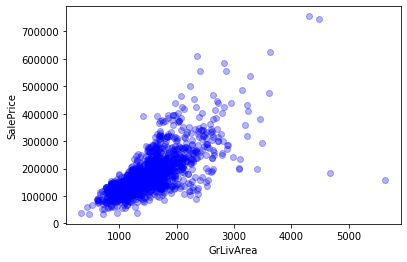

In [17]:
plt.scatter(df.GrLivArea, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

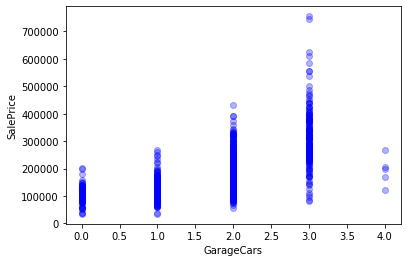

In [18]:
plt.scatter(df.GarageCars, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

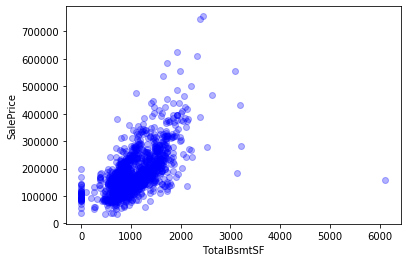

In [19]:
plt.scatter(df.TotalBsmtSF, df.SalePrice, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

In [20]:
df[['GrLivArea','GarageCars','TotalBsmtSF']].corr()

,GrLivArea,GarageCars,TotalBsmtSF
GrLivArea,1.000000,0.467247,0.454868
GarageCars,0.467247,1.000000,0.434585
TotalBsmtSF,0.454868,0.434585,1.000000


Сильной корреляции между метрическими предикторами не наблюдается.

### Категориальные предикторы

In [21]:
df['HeatingQC'].value_counts() #Heating quality and condition
#Po=Poor, Fa=Fair, Gd=Good, TA=Average/Typical, Ex=Excellent

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Перекодируем в набор дамми-переменных.

In [22]:
df['HeatingQC_Poor'] = (df.HeatingQC == 'Po').astype(int) 
print(df['HeatingQC_Poor'].value_counts()) 
#эту переменную мы не будем добавлять в модель, поскольку такое значение только у одного объекта наблюдения

0    1459
1       1
Name: HeatingQC_Poor, dtype: int64


In [23]:
df['HeatingQC_Fair'] = (df.HeatingQC == 'Fa').astype(int) 
print(df['HeatingQC_Fair'].value_counts()) 

0    1411
1      49
Name: HeatingQC_Fair, dtype: int64


In [24]:
df['HeatingQC_Good'] = (df.HeatingQC == 'Gd').astype(int) 
print(df['HeatingQC_Good'].value_counts()) 

0    1219
1     241
Name: HeatingQC_Good, dtype: int64


In [25]:
df['HeatingQC_Average'] = (df.HeatingQC == 'TA').astype(int) 
print(df['HeatingQC_Average'].value_counts()) 

0    1032
1     428
Name: HeatingQC_Average, dtype: int64


In [26]:
df['HeatingQC_Excellent'] = (df.HeatingQC == 'Ex').astype(int) 
print(df['HeatingQC_Excellent'].value_counts()) 
#эту переменную не будем добавлять в модель, посольку это будет референтная группа

1    741
0    719
Name: HeatingQC_Excellent, dtype: int64


In [27]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HeatingQC_Poor,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Average,HeatingQC_Excellent
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,0,0,0,0,1
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,0,0,0,0,1
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,0,0,0,0,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,0,0,1,0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,8,2007,WD,Normal,175000,0,0,0,0,1
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2010,WD,Normal,210000,0,0,0,1,0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,5,2010,WD,Normal,266500,0,0,0,0,1


Второй способ создания дамми-переменных

In [28]:
df['PavedDrive'].value_counts()
#Paved driveway (Асфальтированная дорога)
#Y=Paved, N=Dirt/Gravel, P=Partial Pavement
#группа Paved будет референтной

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [29]:
PavedDrive_dummies=pd.get_dummies(df.PavedDrive, prefix='PavedDrive', prefix_sep='_')
PavedDrive_dummies.head(50)

,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [30]:
df = pd.concat([df, PavedDrive_dummies], axis=1) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,HeatingQC_Poor,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Average,HeatingQC_Excellent,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,208500,0,0,0,0,1,0,0,1
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,Normal,181500,0,0,0,0,1,0,0,1
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,223500,0,0,0,0,1,0,0,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,0,0,1,0,0,0,0,1
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,Normal,250000,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,175000,0,0,0,0,1,0,0,1
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,210000,0,0,0,1,0,0,0,1
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,266500,0,0,0,0,1,0,0,1


# Регрессия

In [31]:
import statsmodels.api as sm
df_model1 = df.dropna(subset=['SalePrice', 'GrLivArea'])
df_model1.shape

(1460, 88)

# Простая линейная регрессия

In [32]:
x_simple = df_model1['GrLivArea']
y = df_model1['SalePrice']
x_simple_constant = sm.add_constant(x_simple) #добавление константы в модель
model1 = sm.OLS(y, x_simple_constant).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          4.52e-223
Time:                        17:32:35   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

1.857e+04 = 18570

# Множественная линейная регрессия

In [33]:
df_model2 = df.dropna(subset=['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'HeatingQC_Fair', 'HeatingQC_Good',
                       'HeatingQC_Average', 'PavedDrive_N', 'PavedDrive_P']) 
#HeatingQC_Excellent, PavedDrive_Y - референтные групы 
df_model2.shape

(1460, 88)

In [34]:
x_mult = df_model2[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'HeatingQC_Fair', 'HeatingQC_Good',
                       'HeatingQC_Average', 'PavedDrive_N', 'PavedDrive_P']]
y = df_model2['SalePrice']
x_mult_constant = sm.add_constant(x_mult)

In [35]:
model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:32:40   Log-Likelihood:                -17648.
No. Observations:                1460   AIC:                         3.531e+04
Df Residuals:                    1451   BIC:                         3.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -646.7508   4723.09

### Модель со стандартизированными коэффицентами (бета-коэффициентами)

In [36]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())
#значения стандартизированных коэффициентов можно сравнивать друг с другом
#можно определить какой из предикторов сильней взаимосвязан с зависимой переменной

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              438.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:32:42   Log-Likelihood:                         -1175.5
No. Observations:                1460   AIC:                                      2367.
Df Residuals:                    1452   BIC:                                      2409.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Характеристика модели

In [37]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.707001
F-test significance = 0.000000


Модель статистически значима. Объясняет 70,7% вариации значений зависимой переменной.

In [38]:
f'Статистически значимые параметры модели: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['GrLivArea' 'GarageCars' 'TotalBsmtSF' 'HeatingQC_Fair' 'HeatingQC_Good'\n 'HeatingQC_Average' 'PavedDrive_N']"

In [39]:
f'Статистически не значимые параметры модели: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['const' 'PavedDrive_P']"

In [40]:
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))

Y = -646.750761 + 64.17*GrLivArea + 28180.79*GarageCars + 45.49*TotalBsmtSF + -27973.16*HeatingQC_Fair + -20053.83*HeatingQC_Good + -28387.50*HeatingQC_Average + -14537.44*PavedDrive_N + -5899.33*PavedDrive_P


### Интерпретация значений коэффициентов регрессии

- Рассмотрим коэффициент при переменной GrLivArea, которая отражает жилую площадь надземных этажей в квадратных футах. Регрессионный коэффициент при переменной положительный и равен 64,17. Можно сделать вывод, что при увеличении площади на один квадратный в среднем можно ожидать прирост стоимости на 64,17 долларов.
- TBC

# Диагностика модели

### Остатки

In [41]:
p = stats.kstest(model2.resid, 'norm', args=(model2.resid.mean(), model2.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


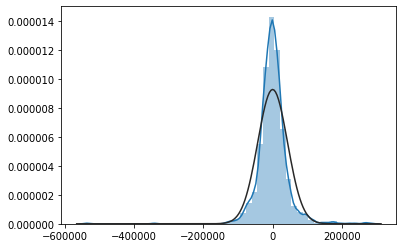

In [42]:
sns.distplot(model2.resid, fit=stats.norm) 

Распределение остатков отличается от нормального.

### Гетероскедастичность

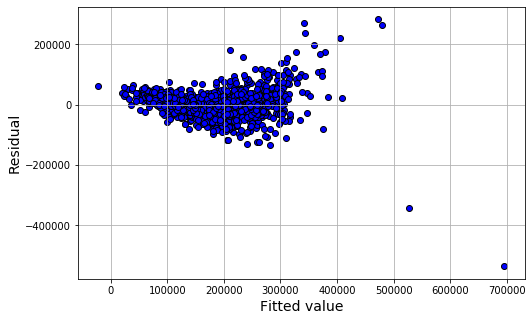

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(x=model2.fittedvalues, y=model2.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Наблюдается взаимосвязь между остатками и спредсказанными значениями зависимой переменной. Следовательно существует проблема гетероскедастичности.

### Мультиколлинеарность

In [44]:
vifs = np.array([vif(model2.model.exog, i) for i in range(model2.model.exog.shape[1])])

In [45]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model2.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
7,1.060293,PavedDrive_P
6,1.106991,PavedDrive_N
3,1.120673,HeatingQC_Fair
4,1.183447,HeatingQC_Good
5,1.255644,HeatingQC_Average
2,1.416413,TotalBsmtSF
0,1.446703,GrLivArea
1,1.532964,GarageCars


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

### Выбросы и влияющие наблюдения

In [46]:
influence = model2.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_GrLivArea,dfb_GarageCars,dfb_TotalBsmtSF,dfb_HeatingQC_Fair,dfb_HeatingQC_Good,dfb_HeatingQC_Average,dfb_PavedDrive_N,dfb_PavedDrive_P,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Id,,,,,,,,,,,,,,,
1,0.001810,0.001094,0.000220,-0.002323,-0.000962,-0.001887,-0.002147,-0.000660,-0.000162,0.000002,0.095360,0.001973,0.004240,0.095327,0.004238
2,-0.006043,0.007146,-0.001420,-0.003773,0.002564,0.005171,0.006561,0.000323,-0.000098,0.000019,-0.292810,0.001989,-0.013073,-0.292718,-0.013069
3,0.004131,0.003838,-0.000038,-0.005578,-0.002509,-0.005027,-0.005717,-0.001801,-0.000469,0.000014,0.262751,0.001885,0.011417,0.262666,0.011413
4,0.034733,-0.004559,-0.088519,0.052101,-0.009778,-0.097347,-0.019617,0.001613,0.007008,0.002283,-1.593115,0.008030,-0.143336,-1.593960,-0.143412
5,0.009041,-0.012728,-0.020011,0.013972,0.002709,0.007436,0.006453,-0.001199,-0.000590,0.000151,-0.628086,0.003424,-0.036816,-0.627955,-0.036808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.012656,-0.003827,-0.001421,0.011248,0.006679,0.013252,0.015382,0.003997,0.000923,0.000087,-0.690779,0.001629,-0.027903,-0.690654,-0.027898
1457,0.017153,-0.011193,0.001504,-0.010936,-0.003903,-0.004372,-0.022813,0.002010,0.002261,0.000109,-0.476624,0.004290,-0.031285,-0.476497,-0.031277
1458,0.010481,0.048167,-0.049091,-0.004959,-0.008521,-0.017657,-0.021801,-0.014935,-0.005304,0.000507,0.846692,0.006319,0.067522,0.846610,0.067515


In [47]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

Id
1299   -5.468060
524    -1.501677
692     1.004751
Name: dffits, dtype: float64

In [48]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

Id
1299   -13.313209
524     -8.061209
1325    -3.107634
729     -3.059755
474      3.240085
592      3.307445
1244     3.567157
1182     3.667885
770      3.927135
179      4.041595
441      4.119504
689      4.194022
1047     4.606253
1170     5.145381
804      5.558587
1183     6.217440
899      6.284147
692      6.634514
Name: standard_resid, dtype: float64